# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# If running code from previous CSV output (possibly to avoid pinging API too many times), uncomment the second line.
run_api = True
#run_api = False

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#If running api, run below code. Otherwise, skip whole cell.
if run_api:

    # While loop ensures that the list of cities is always at least 500 unique cities. Defaults to true until loop breaks.
    while True:
        # List for holding lat_lngs and cities
        lat_lngs = []
        cities = []

        # Create a set of random lat and lng combinations
        lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
        lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
        lat_lngs = zip(lats, lngs)

        # Identify nearest city for each lat, lng combination
        for lat_lng in lat_lngs:
            city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
            # If the city is unique, then add it to a our cities list
            if city not in cities:
                cities.append(city)

        # If statement confirms that city count is sufficient. Otherwise the loop is rerun.
        if len(cities) >= 500:
            print(f"There were {len(cities)} unique cities in the list.")
            break
        else:
            print(f"There were only {len(cities)} unique cities in the list. Rerunning list.")
        

There were 638 unique cities in the list.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#If running api, run below code. Otherwise, skip whole cell.
if run_api:

    # Perform API calls and print log of each city as calls are being made.

    # Set base url and initialize counting number.  Full url will follow that of the one below from API doc.
    #      api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    counted_cities = 0

    # Initialize empty lists for relevant values.
    city_list = []
    lat_list = []
    lng_list = []
    max_temp_list = []
    humidity_list = []
    cloudiness_list = []
    wind_speed_list = []
    country_list = []
    date_list = []


    # Print for human eyes
    print("Beginning Data Retrieval")
    print("--------------------------------------")


    # for loop runs through all cities in cities array.

    for city in cities:

        # try ensures that even if city is not in database, the loop continues.
        # query_url is the url to grab data from api.  Response is where that data is stored.
        try:
            query_url = f"{base_url}?q={city}&appid={weather_api_key}"
            response = requests.get(query_url).json()
        
            # All list appends append relevant data to relevant list.
            city_list.append(response["name"])
            lat_list.append(response["coord"]["lat"])
            lng_list.append(response["coord"]["lon"])
            max_temp_list.append(response["main"]["temp_max"])
            humidity_list.append(response["main"]["humidity"])
            cloudiness_list.append(response["clouds"]["all"])
            wind_speed_list.append(response["wind"]["speed"])
            country_list.append(response["sys"]["country"])
            date_list.append(response["dt"])
        
            # Counted cities is a variable solely for the human that must waste as a guideline for how many cities remain.
            # Print the number of cities counted and the name of the city counted.
            counted_cities += 1
            print(f"Processing Record {counted_cities} | {city}")
    
        # If try fails, the except is triggered and the message states simply that the city is not found, then skips it.
        except:
            print(f"City not found.  Skipping the city {city}")

Beginning Data Retrieval
--------------------------------------
Processing Record 1 | iqaluit
Processing Record 2 | hobart
Processing Record 3 | yellowknife
Processing Record 4 | punta arenas
Processing Record 5 | guerrero negro
Processing Record 6 | bengkulu
Processing Record 7 | chokurdakh
City not found.  Skipping the city labutta
Processing Record 8 | butaritari
City not found.  Skipping the city taolanaro
Processing Record 9 | hermanus
Processing Record 10 | saint-georges
Processing Record 11 | khatanga
Processing Record 12 | cayenne
Processing Record 13 | dikson
Processing Record 14 | arraial do cabo
Processing Record 15 | kapaa
Processing Record 16 | lavrentiya
Processing Record 17 | flinders
Processing Record 18 | jamestown
Processing Record 19 | ushuaia
Processing Record 20 | kaitangata
Processing Record 21 | hay river
City not found.  Skipping the city amderma
Processing Record 22 | tiksi
Processing Record 23 | hauterive
Processing Record 24 | port elizabeth
Processing Record

Processing Record 226 | sumbe
City not found.  Skipping the city bacuit
Processing Record 227 | fairlie
Processing Record 228 | leshukonskoye
City not found.  Skipping the city chagda
Processing Record 229 | port maria
Processing Record 230 | doume
Processing Record 231 | bembibre
Processing Record 232 | coron
Processing Record 233 | ketchikan
Processing Record 234 | naron
Processing Record 235 | san policarpo
Processing Record 236 | sangar
Processing Record 237 | kinshasa
Processing Record 238 | nassau
City not found.  Skipping the city khonuu
Processing Record 239 | xiaoshi
Processing Record 240 | anadyr
City not found.  Skipping the city maloshuyka
Processing Record 241 | longyearbyen
Processing Record 242 | kodiak
Processing Record 243 | grand forks
Processing Record 244 | saint-philippe
Processing Record 245 | praya
City not found.  Skipping the city buqayq
Processing Record 246 | yantal
Processing Record 247 | ballina
Processing Record 248 | terney
Processing Record 249 | nautla


Processing Record 442 | shaunavon
Processing Record 443 | tena
Processing Record 444 | obihiro
Processing Record 445 | bairiki
Processing Record 446 | praia da vitoria
Processing Record 447 | bafoulabe
Processing Record 448 | laizhou
Processing Record 449 | pacific grove
Processing Record 450 | katsuura
Processing Record 451 | krasnoselkup
Processing Record 452 | xai-xai
Processing Record 453 | la orotava
Processing Record 454 | pitimbu
Processing Record 455 | koygorodok
Processing Record 456 | luau
Processing Record 457 | semnan
Processing Record 458 | faya
Processing Record 459 | port augusta
Processing Record 460 | cucutilla
Processing Record 461 | miri
Processing Record 462 | gushikawa
Processing Record 463 | praia
City not found.  Skipping the city bolshoy tsaryn
Processing Record 464 | mbaiki
Processing Record 465 | gofitskoye
Processing Record 466 | yakeshi
Processing Record 467 | coihaique
Processing Record 468 | indramayu
Processing Record 469 | katobu
City not found.  Skippin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#If running api, run below code.
if run_api:
    
    # Converting arrays to a dataframe
    weather_df = pd.DataFrame({"City" : city_list,
                               "Latitude" : lat_list,
                               "Longitude" : lng_list,
                               "Maximum Temperature (\u00B0F)" : max_temp_list,
                               "Humidity (%)" : humidity_list,
                               "Cloudiness (%)" : cloudiness_list,
                               "Wind Speed (mph)" : wind_speed_list,
                               "Country" : country_list,
                               "Date" : date_list
                              }
                             )
    
    # Convert the temperature in Kelvin to degrees Farenheit.
    weather_df["Maximum Temperature (\u00B0F)"] = weather_df["Maximum Temperature (\u00B0F)"]*9/5-459.67
    
    # Change date to today's date, which is the date upon which the data is gathered.
    weather_df["Date"]=date.today().isoformat()
    
    # Exports dataframe to CSV file.
    weather_df.to_csv(output_data_file, index=False)

# If not running api, converts previous csv outout to weather dataframe.
else:
    weather_df = pd.read_csv(output_data_file)

In [5]:
# Outputs dataframe
weather_df.head()

,City,Latitude,Longitude,Maximum Temperature (°F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Iqaluit,63.75,-68.51,57.200,62,90,2.60,CA,2020-07-23
1,Hobart,-42.88,147.33,44.996,75,75,5.10,AU,2020-07-23
2,Yellowknife,62.46,-114.35,60.800,82,75,6.20,CA,2020-07-23
3,Punta Arenas,-53.15,-70.92,39.200,80,75,6.20,CL,2020-07-23
4,Guerrero Negro,27.98,-114.06,72.212,61,1,8.07,MX,2020-07-23


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Max humidity is checked.  If less than or equal to 100, the dataset is simply renamed.
if weather_df["Humidity (%)"].max()<=100:
    clean_city_data = weather_df

# If max humidity is greater than 100, then at least one humidity value is greater than 100.
else:
    #  Get the indices of cities that have humidity over 100%.
    underwater_city_indices = weather_df.loc[weather_df["Humidity"] > 100].index.values.tolist()
    
    # Drop all indices that correspond with too high humidity to create a clean dataframe.
    clean_city_data = weather_df.drop(underwater_city_indices)
    
    # Export the clean city data into a csv.
    clean_city_data.to_csv(output_data_file, index=False)      

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
# OPTIONAL: Create a function to create Linear Regression plots
# Because it further streamlines the code, I decided to also create a function for the scatter plots.

# A function that creates the scatter plots.
def make_scatter_plots(x_values, y_values, hemisphere):
    
    # Ensures the correct dataframe is being used.
    if hemisphere == "both":
        df = clean_city_data
    elif hemisphere == "Northern":
        df = northern_city_clean_df
    else:
        df = southern_city_clean_df
    
    # Extracts the x and y values to be examined from the clean city dataframe.
    x = df[x_values]
    y = df[y_values]

    # Labels, titles, and scatter plot is made.
    plt.xlabel(x_values)
    plt.ylabel(y_values)
    plt.title(f'{y_values} by {x_values} on ({df["Date"].min()})')
    plt.scatter(x,y)
    
    # Saves plot as a png
    if hemisphere == "both":
        plt.savefig(f"output_data/{y_values}_by_{x_values}.png", format="png")
    else:
        plt.savefig(f"output_data/{y_values}_by_{x_values}_in_{hemisphere}_hemisphere.png", format="png") 

# A function that runs the linear regression.
def lin_regress(x_values, y_values, hemisphere):
    
    # Creates the scatter plot onto which the linear regression will be mapped.
    make_scatter_plots(x_values, y_values, hemisphere)

    # Ensures the correct dataframe is being used.
    if hemisphere == "both":
        df = clean_city_data
    elif hemisphere == "Northern":
        df = northern_city_clean_df
    else:
        df = southern_city_clean_df
    
    # Extracts the x and y values to be examined from the dataframe remembered from running scatter plot.
    x = df[x_values]
    y = df[y_values]
    
    # Run linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot(x, intercept + slope*x, 'r')
    r_out = r_value*r_value
    r_out = r_out.round(decimals=5)
    
    # Change plot title
    plt.title(f'{y_values} by {x_values} in {hemisphere} Hemisphere on ({df["Date"].min()})')
    
    # Saves plot as a png
    if hemisphere == "both":
        plt.savefig(f"output_data/{y_values}_by_{x_values}.png", format="png")
    else:
        plt.savefig(f"output_data/{y_values}_by_{x_values}_in_{hemisphere}_hemisphere.png", format="png")
    
    return(f"The r-squared for the above linear regression is {r_out}. \n")

## Latitude vs. Temperature Plot

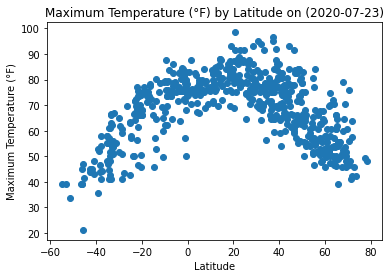

This code tracks the maximum temperature measured in a day at over 500 random locations, and the location's 
latitude. The above chart shows that temperature increases until some latitude is reached, at which point the 
temperature drops with a change in latitude.  This is consistent with the Earth as a sphere floating in space 
recieving energy from the sun at a specific angle.


In [8]:
# The values being compared are saved as the string titles of the relevant columns of the dataframe so only 2 substitutions 
#    need to be made for any given graph.
x_values = "Latitude"
y_values = "Maximum Temperature (\u00B0F)"
hemisphere = "both"

# Makes scatter plot using function.
make_scatter_plots(x_values, y_values, hemisphere)


# Analysis is written
analysis = "This code tracks the maximum temperature measured in a day at over 500 random locations, and the location's \n"
analysis += "latitude. The above chart shows that temperature increases until some latitude is reached, at which point the \n"
analysis += "temperature drops with a change in latitude.  This is consistent with the Earth as a sphere floating in space \n"
analysis += "recieving energy from the sun at a specific angle."

# All outputs are output.
plt.show()
print(analysis)


## Latitude vs. Humidity Plot

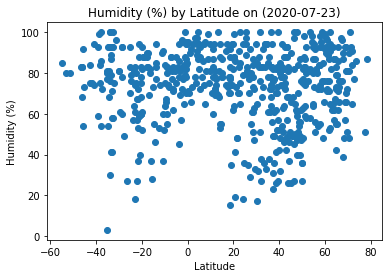

This code tracks the humidity measured in a day at over 500 random locations, and the location's latitude. 
Note that the humidity tends to be quite high regardless of the altitude.  This is probably selection bias, 
as the code tracks by cities and most people will build near a source of water, leading to higher humidity 
at measured locations.  Otherwise, the data appears quite random.


In [9]:
# The values being compared are saved as the string titles of the relevant columns of the dataframe so only 2 substitutions 
#    need to be made for any given graph.
x_values = "Latitude"
y_values = "Humidity (%)"
hemisphere = "both"

# Makes scatter plot using function.
make_scatter_plots(x_values, y_values, hemisphere)

# Analysis is written
analysis = "This code tracks the humidity measured in a day at over 500 random locations, and the location's latitude. \n"
analysis += "Note that the humidity tends to be quite high regardless of the altitude.  This is probably selection bias, \n"
analysis += "as the code tracks by cities and most people will build near a source of water, leading to higher humidity \n"
analysis += "at measured locations.  Otherwise, the data appears quite random."

# All outputs are output.
plt.show()
print(analysis)

## Latitude vs. Cloudiness Plot

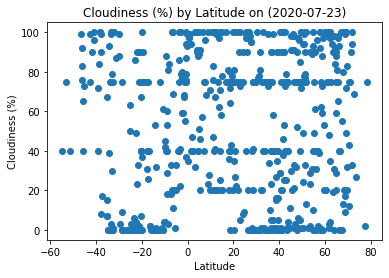

This code tracks the cloudiness as a percentage measured in a day at over 500 random locations, and the 
location's latitude. This data is quite random, and not much of value can be gotten from this particular graph.


In [10]:
# The values being compared are saved as the string titles of the relevant columns of the dataframe so only 2 substitutions 
#    need to be made for any given graph.
x_values = "Latitude"
y_values = "Cloudiness (%)"
hemisphere = "both"

# Makes scatter plot using function.
make_scatter_plots(x_values, y_values, hemisphere)


# Analysis is written
analysis = "This code tracks the cloudiness as a percentage measured in a day at over 500 random locations, and the \n"
analysis += "location's latitude. This data is quite random, and not much of value can be gotten from this particular graph."  


# All outputs are output.
plt.show()
print(analysis)

## Latitude vs. Wind Speed Plot

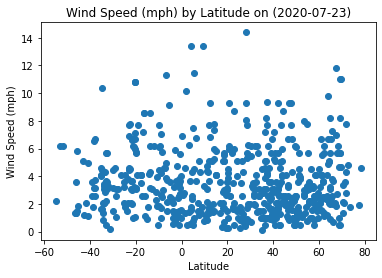

This code tracks the wind speed measured in a day at over 500 random locations, and the location's latitude. 
Note that the highest wind speeds are measured highest near the same latitude as the highest temperature. 
As temperature gradients cause pressure waves which we feel as wind, this is not a surprise.  The hottest 
places may well have the most energetic wind to push elsewhere.  Otherwise, the graph is quite random.


In [11]:
# The values being compared are saved as the string titles of the relevant columns of the dataframe so only 2 substitutions 
#    need to be made for any given graph.
x_values = "Latitude"
y_values = "Wind Speed (mph)"
hemisphere = "both"

# Makes scatter plot using function.
make_scatter_plots(x_values, y_values, hemisphere)

# Analysis is written
analysis = "This code tracks the wind speed measured in a day at over 500 random locations, and the location's latitude. \n"
analysis += "Note that the highest wind speeds are measured highest near the same latitude as the highest temperature. \n"
analysis += "As temperature gradients cause pressure waves which we feel as wind, this is not a surprise.  The hottest \n"
analysis += "places may well have the most energetic wind to push elsewhere.  Otherwise, the graph is quite random."


# All outputs are output.
plt.show()
print(analysis)

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_city_clean_df = clean_city_data.loc[clean_city_data["Latitude"] >= 0]
southern_city_clean_df = clean_city_data.loc[clean_city_data["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

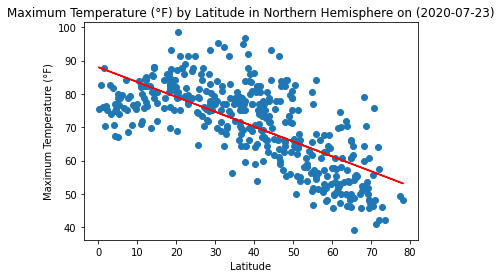

The r-squared for the above linear regression is 0.49229. 
Note by the r-squared value that temperature and latitude are correlated, as explained earlier.  Note however, 
that the peak lowers the r-squared value.  At time of writing, it is July and the earth is warmest a bit north 
of the equator.  Thus the peak is in the Northern Hemisphere, and the r-squared value for that graph lower.


In [13]:
# Relevant hemisphere and x and y axis are defined.
x_values = "Latitude"
y_values = "Maximum Temperature (\u00B0F)"
hemisphere = "Northern"

# Lineaer regression is run and returns the Pearson correlation coefficient stored in the analysis variable.
analysis = lin_regress(x_values, y_values, hemisphere)

# Analysis is written
analysis += "Note by the r-squared value that temperature and latitude are correlated, as explained earlier.  Note however, \n"
analysis += "that the peak lowers the r-squared value.  At time of writing, it is July and the earth is warmest a bit north \n"
analysis += "of the equator.  Thus the peak is in the Northern Hemisphere, and the r-squared value for that graph lower."

# Output the outputs
plt.show()
print(analysis)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

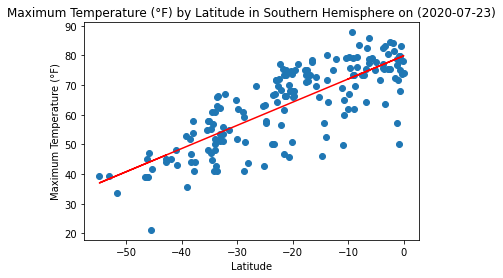

The r-squared for the above linear regression is 0.62964. 
Note by the r-squared value that temperature and latitude are correlated, as explained in the preceding graph. 
It is July at time of writing, so the peak is in the Northern Hemisphere, making the Southern Hemisphere's 
r-squared value higher as it doesn't have a curve.  In December, expect the trend to be reversed.


In [14]:
# Relevant hemisphere and x and y axis are defined.
x_values = "Latitude"
y_values = "Maximum Temperature (\u00B0F)"
hemisphere = "Southern"

# Lineaer regression is run and returns the Pearson correlation coefficient stored in the analysis variable.
analysis = lin_regress(x_values, y_values, hemisphere)

# Analysis is written
analysis += "Note by the r-squared value that temperature and latitude are correlated, as explained in the preceding graph. \n"
analysis += "It is July at time of writing, so the peak is in the Northern Hemisphere, making the Southern Hemisphere's \n"
analysis += "r-squared value higher as it doesn't have a curve.  In December, expect the trend to be reversed."

# Output the outputs
plt.show()
print(analysis)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

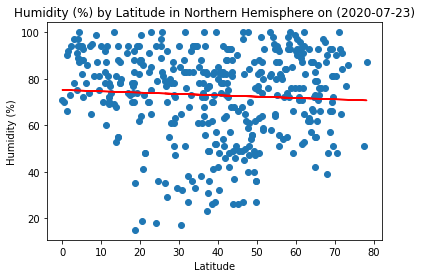

The r-squared for the above linear regression is 0.00347. 
Note by the r-squared value that humidity and latitude are not correlated, as explained in the earlier graph.


In [15]:
# Relevant hemisphere and x and y axis are defined.
x_values = "Latitude"
y_values = "Humidity (%)"
hemisphere = "Northern"

# Lineaer regression is run and returns the Pearson correlation coefficient stored in the analysis variable.
analysis = lin_regress(x_values, y_values, hemisphere)

# Analysis is written
analysis += "Note by the r-squared value that humidity and latitude are not correlated, as explained in the earlier graph."

# Output the outputs
plt.show()
print(analysis)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

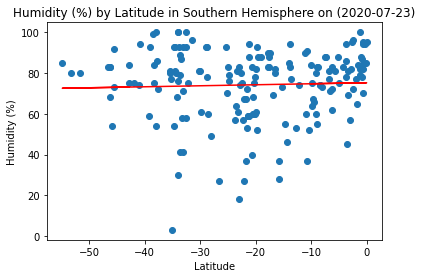

The r-squared for the above linear regression is 0.00152. 
Note by the r-squared value that humidity and latitude are not correlated, as explained in the earlier graph.


In [16]:
# Relevant hemisphere and x and y axis are defined.
x_values = "Latitude"
y_values = "Humidity (%)"
hemisphere = "Southern"

# Lineaer regression is run and returns the Pearson correlation coefficient stored in the analysis variable.
analysis = lin_regress(x_values, y_values, hemisphere)

# Analysis is written
analysis += "Note by the r-squared value that humidity and latitude are not correlated, as explained in the earlier graph."

# Output the outputs
plt.show()
print(analysis)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

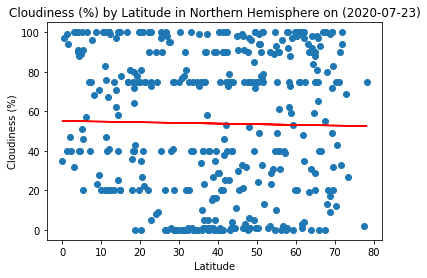

The r-squared for the above linear regression is 0.00031. 
Note by the r-squared value that cloudiness and latitude are not correlated, as explained in the earlier graph.


In [17]:
# Relevant hemisphere and x and y axis are defined.
x_values = "Latitude"
y_values = "Cloudiness (%)"
hemisphere = "Northern"

# Lineaer regression is run and returns the Pearson correlation coefficient stored in the analysis variable.
analysis = lin_regress(x_values, y_values, hemisphere)

# Analysis is written
analysis += "Note by the r-squared value that cloudiness and latitude are not correlated, as explained in the earlier graph."

# Output the outputs
plt.show()
print(analysis)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

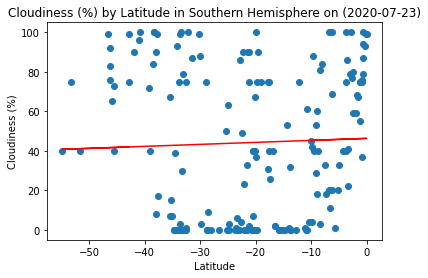

The r-squared for the above linear regression is 0.00138. 
Note by the r-squared value that cloudiness and latitude are not correlated, as explained in the earlier graph.


In [18]:
# Relevant hemisphere and x and y axis are defined.
x_values = "Latitude"
y_values = "Cloudiness (%)"
hemisphere = "Southern"

# Lineaer regression is run and returns the Pearson correlation coefficient stored in the analysis variable.
analysis = lin_regress(x_values, y_values, hemisphere)

# Analysis is written
analysis += "Note by the r-squared value that cloudiness and latitude are not correlated, as explained in the earlier graph."

# Output the outputs
plt.show()
print(analysis)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

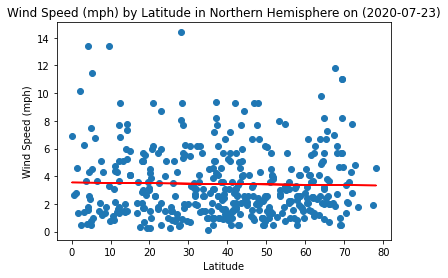

The r-squared for the above linear regression is 0.00049. 
Note by the r-squared value that wind speed and latitude are not correlated, as explained in the earlier graph.


In [19]:
# Relevant hemisphere and x and y axis are defined.
x_values = "Latitude"
y_values = "Wind Speed (mph)"
hemisphere = "Northern"

# Lineaer regression is run and returns the Pearson correlation coefficient stored in the analysis variable.
analysis = lin_regress(x_values, y_values, hemisphere)

# Analysis is written
analysis += "Note by the r-squared value that wind speed and latitude are not correlated, as explained in the earlier graph."

# Output the outputs
plt.show()
print(analysis)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

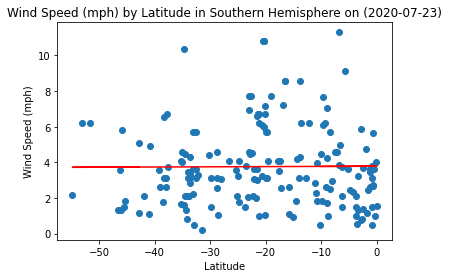

The r-squared for the above linear regression is 5e-05. 
Note by the r-squared value that wind speed and latitude are not correlated, as explained in the earlier graph.


In [20]:
# Relevant hemisphere and x and y axis are defined.
x_values = "Latitude"
y_values = "Wind Speed (mph)"
hemisphere = "Southern"

# Lineaer regression is run and returns the Pearson correlation coefficient stored in the analysis variable.
analysis = lin_regress(x_values, y_values, hemisphere)

# Analysis is written
analysis += "Note by the r-squared value that wind speed and latitude are not correlated, as explained in the earlier graph."

# Output the outputs
plt.show()
print(analysis)